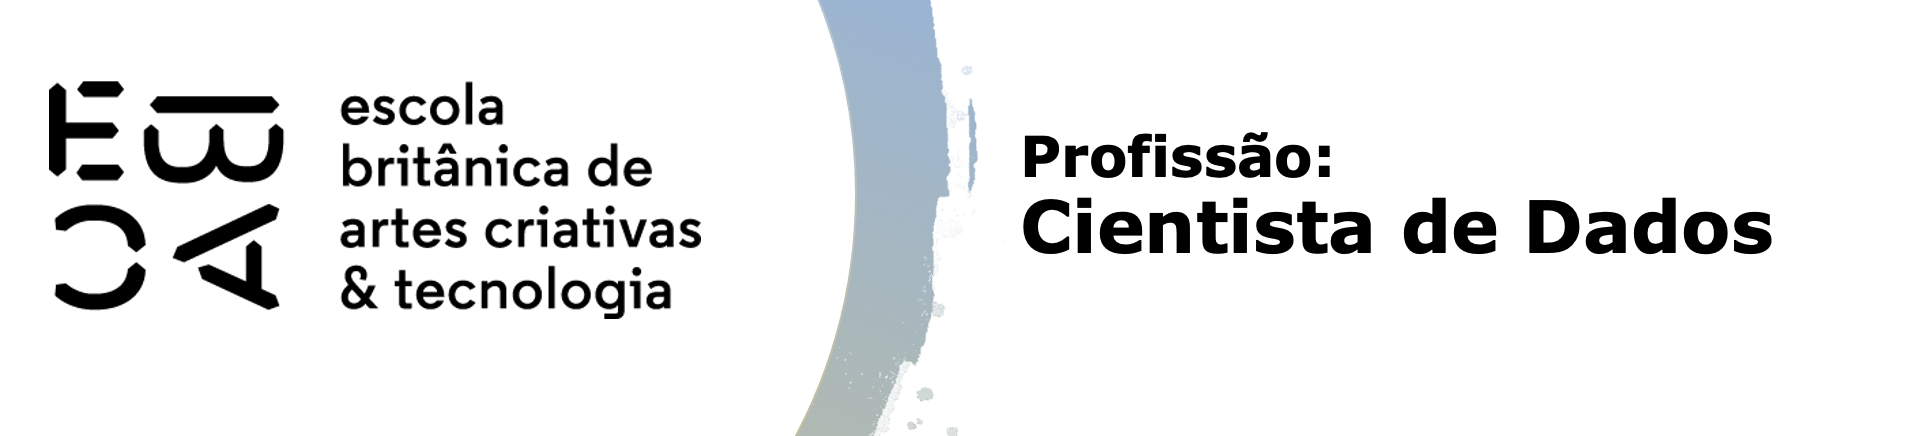

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

#### 1.1 Carregamento dos pacotes necessários 
Os pacotes necessários para esta tarefa são:
- Pandas para leitura e modificação dos dados;
- Numpy que permite operações matemáticas;
- Matplotlib.pyplot para a geração de gráficos;
- seaborn para visualização de gráficos estatísticos;
- Graphviz para visualizar as árvores de classificação criadas;
- Função train_test_split do pacote sklearn.model_selection para dividir a base de teste em validação e teste;
- Função DecisionTreeClassifier do sklearn.tree para a aplicação das árvores de classificação;
- Função export_graphviz para submeter os dados da árvore ao pacote graphviz;
- Funções confusion_matrix e ConfusionMatrixDisplay do pacote sklearn.metrics para ajuste e visualização da matriz de confusão do ajuste final da árvore de classificação;
- Função GridSearchCV do pacote sklearn.model_selection para realizar a Cross Validation do tipo K-fold com Holdout na base de treinamento.

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

%matplotlib inline

#### 1.2 Carregamento das bases necessárias
As bases em questão são a X_train, que apresenta os dados para treino do ajuste de árvore de classificação; X_test, onde estão os dados de treino do ajuste; y_train, com a variável resposta na base de treino; y_test, com a variável resposta na base de teste. Todas as bases são lidas a partir dos arquivos csv salvos na atividade anterior.

In [75]:
# Lê o arquivo X_train.csv, tomando com índices as duas colunas definidas anteriormente ('index' e 'subject train')
X_treino = pd.read_csv('./X_train.csv', index_col=['index', 'subject train'])

# Visualiza as 10 primeiras linhas do dataframe resultante
X_treino.head(10)

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
index,subject train,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
5,1,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126
6,1,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,0.145844,-0.217198,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010
7,1,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,0.136382,-0.082307,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976
8,1,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,0.314038,-0.269401,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364


In [76]:
# Lê o arquivo X_test.csv, tomando com índices as duas colunas definidas anteriormente ('index' e 'subject test')
X_teste = pd.read_csv('./X_test.csv', index_col=['index', 'subject test'])

# Visualiza as 10 primeiras linhas do dataframe resultante
X_teste.head(10)

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
index,subject test,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
5,2,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,0.083603,-0.493517,-0.857565,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471
6,2,0.279746,-0.018271,-0.104000,-0.995819,-0.976354,-0.977725,-0.995996,-0.973665,-0.979253,-0.937856,...,0.272339,-0.093855,-0.391286,-0.309083,-0.000857,0.728514,-0.333771,-0.690085,0.295282,-0.067065
7,2,0.274601,-0.025035,-0.116831,-0.995594,-0.982069,-0.985262,-0.995341,-0.981485,-0.984610,-0.941263,...,0.213799,-0.338123,-0.672358,-0.025526,-0.214033,0.437640,-0.366674,-0.688785,0.295981,-0.067706
8,2,0.272529,-0.020954,-0.114472,-0.996784,-0.975906,-0.986597,-0.997029,-0.973735,-0.985556,-0.941263,...,0.283428,-0.629599,-0.853248,0.144626,-0.035564,-0.181800,0.087320,-0.685390,0.299394,-0.065491


In [77]:
# Lê o arquivo y_train.csv, removendo a coluna extra de índice ('Unnamed: 0')
y_treino = pd.read_csv('./y_train.csv', index_col=['Unnamed: 0'])

# Visualiza as 10 primeiras linhas do dataframe resultante
y_treino.head(10)

,0
0,5
1,5
2,5
3,5
4,5
5,5
6,5
7,5
8,5
9,5


In [78]:
# Lê o arquivo y_test.csv, removendo a coluna extra de índice ('Unnamed: 0')
y_teste = pd.read_csv('./y_test.csv', index_col=['Unnamed: 0'])

# Visualiza as 10 primeiras linhas do dataframe resultante
y_teste.head(10)

,0
0,5
1,5
2,5
3,5
4,5
5,5
6,5
7,5
8,5
9,5


### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamos acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

No exercício anterior foi observado que as "3 melhores variáveis" para o ajuste da árvore de classificação são: 'tGravityAcc-mean()-X', 'fBodyAccJerk-bandsEnergy()-1,16' e 'angle(Y,gravityMean)'. Vamos filtrar as bases de treinamento e teste apenas com estas variáveis.

In [79]:
# Tomando as 3 colunas de maior importância da base de treino
X_treino_filtrado = X_treino[['tGravityAcc-mean()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 
                              'angle(Y,gravityMean)']]

# Tomando as 3 colunas de maior importância da base de teste
X_teste_filtrado = X_teste[['tGravityAcc-mean()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 
                              'angle(Y,gravityMean)']]

Em posse das bases filtradas apenas com as 3 variáveis mais adequadas, vamos calcular os ccp_alphas do ajuste da base de treinamento em uma árvore de classificação com número mínimo de amostras por folha igual a 20.

In [80]:
%%time

# Criação de uma nova árvore
arvore_inicial = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20)

# Ajuste do caminho custo custo complexidade da árvore na base de treino
caminho = arvore_inicial.cost_complexity_pruning_path(X_treino_filtrado, y_treino)

# Obtenção dos ccp_alphas e impurezas do ajuste
ccp_alphas, impurezas = caminho.ccp_alphas, caminho.impurities

Wall time: 46.2 ms


Para prevenir que hajam valores negativos ou duplicados nos array ccp_alphas criado, vamos filtrá-lo a partir da função np.unique() do pacote numpy.

In [81]:
#garantindo que os ccp_alphas são únicos e positivos
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

# Visualizando os valores no array ccp_alpha e o comprimento do vetor
print(f'Há {len(ccp_alphas)} componentes no vetor ccp_alphas.')
ccp_alphas

Há 126 componentes no vetor ccp_alphas.


array([0.00000000e+00, 5.88819958e-08, 6.43621258e-06, 6.59966132e-06,
       6.80087051e-06, 8.23946945e-06, 8.26772494e-06, 8.91148550e-06,
       9.54151982e-06, 1.10109332e-05, 1.11509769e-05, 1.12766571e-05,
       1.16993996e-05, 1.26301881e-05, 3.10409638e-05, 3.30708997e-05,
       3.39160296e-05, 3.86322875e-05, 3.88621172e-05, 4.23215165e-05,
       4.67440114e-05, 4.85876625e-05, 5.05419885e-05, 5.30175389e-05,
       6.05895736e-05, 6.12078346e-05, 6.23952882e-05, 6.67721832e-05,
       6.95768256e-05, 7.04979126e-05, 7.50156626e-05, 7.65046875e-05,
       7.93434893e-05, 8.19227767e-05, 8.29058500e-05, 8.77498238e-05,
       8.88760179e-05, 9.21895780e-05, 9.46208071e-05, 9.95342357e-05,
       1.06870822e-04, 1.10257996e-04, 1.25203905e-04, 1.34366154e-04,
       1.35127464e-04, 1.42193173e-04, 1.50529595e-04, 1.52583633e-04,
       1.55692169e-04, 1.62493526e-04, 1.82626410e-04, 2.13054302e-04,
       2.26601775e-04, 2.32136380e-04, 2.56825309e-04, 2.57094684e-04,
      

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

O Grid Search aplica o método K-fold com Holdout aos dados fornecidos. Neste método, os dados são separados em k bases de treinamento e teste, e sobre estas bases são ajustadas árvores de classificação para cada valor de ccp_alpha obtido na etapa anterior.

Para evitar que este processo demore muito, vamos selecionar 1 ccp_alpha a cada 5 dentro do conjunto.

In [82]:
# Seleciona 1 valor de ccp_alpha para cada 5 dentro do conjunto
grid_parametros = {'ccp_alpha':ccp_alphas[::5]}

# Mostra os valores selecionados
grid_parametros

{'ccp_alpha': array([0.00000000e+00, 8.23946945e-06, 1.11509769e-05, 3.30708997e-05,
        4.67440114e-05, 6.12078346e-05, 7.50156626e-05, 8.77498238e-05,
        1.06870822e-04, 1.42193173e-04, 1.82626410e-04, 2.57094684e-04,
        2.99953740e-04, 3.79746182e-04, 4.53126049e-04, 5.38579348e-04,
        5.90160877e-04, 6.43217863e-04, 9.24048677e-04, 1.04215101e-03,
        1.29302406e-03, 1.81688064e-03, 2.48179839e-03, 3.75767689e-03,
        9.57261960e-03, 1.85974665e-01])}

In [83]:
%%time

# Gera um conjunto de árvores para cada valor de ccp_alpha (método K-fold com Holdout)
grid = GridSearchCV(estimator = arvore_inicial, param_grid=grid_parametros,cv=10, verbose=100)

# Ajuta a base de treinamento com as variáveis selecionadas a cada árvore gerada
grid.fit(X_treino_filtrado, y_treino) 

Fitting 10 folds for each of 26 candidates, totalling 260 fits
[CV 1/10; 1/26] START ccp_alpha=0.0.............................................
[CV 1/10; 1/26] END ..............ccp_alpha=0.0;, score=0.674 total time=   0.0s
[CV 2/10; 1/26] START ccp_alpha=0.0.............................................
[CV 2/10; 1/26] END ..............ccp_alpha=0.0;, score=0.719 total time=   0.0s
[CV 3/10; 1/26] START ccp_alpha=0.0.............................................
[CV 3/10; 1/26] END ..............ccp_alpha=0.0;, score=0.850 total time=   0.0s
[CV 4/10; 1/26] START ccp_alpha=0.0.............................................
[CV 4/10; 1/26] END ..............ccp_alpha=0.0;, score=0.725 total time=   0.0s
[CV 5/10; 1/26] START ccp_alpha=0.0.............................................
[CV 5/10; 1/26] END ..............ccp_alpha=0.0;, score=0.777 total time=   0.0s
[CV 6/10; 1/26] START ccp_alpha=0.0.............................................
[CV 6/10; 1/26] END ..............ccp_alpha=0.

[CV 10/10; 5/26] END ccp_alpha=4.6744011402473514e-05;, score=0.776 total time=   0.0s
[CV 1/10; 6/26] START ccp_alpha=6.120783460282931e-05...........................
[CV 1/10; 6/26] END ccp_alpha=6.120783460282931e-05;, score=0.674 total time=   0.0s
[CV 2/10; 6/26] START ccp_alpha=6.120783460282931e-05...........................
[CV 2/10; 6/26] END ccp_alpha=6.120783460282931e-05;, score=0.719 total time=   0.0s
[CV 3/10; 6/26] START ccp_alpha=6.120783460282931e-05...........................
[CV 3/10; 6/26] END ccp_alpha=6.120783460282931e-05;, score=0.850 total time=   0.0s
[CV 4/10; 6/26] START ccp_alpha=6.120783460282931e-05...........................
[CV 4/10; 6/26] END ccp_alpha=6.120783460282931e-05;, score=0.725 total time=   0.0s
[CV 5/10; 6/26] START ccp_alpha=6.120783460282931e-05...........................
[CV 5/10; 6/26] END ccp_alpha=6.120783460282931e-05;, score=0.777 total time=   0.0s
[CV 6/10; 6/26] START ccp_alpha=6.120783460282931e-05...........................
[C

[CV 1/10; 11/26] END ccp_alpha=0.00018262640954745928;, score=0.674 total time=   0.0s
[CV 2/10; 11/26] START ccp_alpha=0.00018262640954745928.........................
[CV 2/10; 11/26] END ccp_alpha=0.00018262640954745928;, score=0.719 total time=   0.0s
[CV 3/10; 11/26] START ccp_alpha=0.00018262640954745928.........................
[CV 3/10; 11/26] END ccp_alpha=0.00018262640954745928;, score=0.850 total time=   0.0s
[CV 4/10; 11/26] START ccp_alpha=0.00018262640954745928.........................
[CV 4/10; 11/26] END ccp_alpha=0.00018262640954745928;, score=0.714 total time=   0.0s
[CV 5/10; 11/26] START ccp_alpha=0.00018262640954745928.........................
[CV 5/10; 11/26] END ccp_alpha=0.00018262640954745928;, score=0.776 total time=   0.0s
[CV 6/10; 11/26] START ccp_alpha=0.00018262640954745928.........................
[CV 6/10; 11/26] END ccp_alpha=0.00018262640954745928;, score=0.736 total time=   0.0s
[CV 7/10; 11/26] START ccp_alpha=0.00018262640954745928..................

[CV 1/10; 16/26] END ccp_alpha=0.0005385793481802004;, score=0.727 total time=   0.0s
[CV 2/10; 16/26] START ccp_alpha=0.0005385793481802004..........................
[CV 2/10; 16/26] END ccp_alpha=0.0005385793481802004;, score=0.717 total time=   0.0s
[CV 3/10; 16/26] START ccp_alpha=0.0005385793481802004..........................
[CV 3/10; 16/26] END ccp_alpha=0.0005385793481802004;, score=0.849 total time=   0.0s
[CV 4/10; 16/26] START ccp_alpha=0.0005385793481802004..........................
[CV 4/10; 16/26] END ccp_alpha=0.0005385793481802004;, score=0.714 total time=   0.0s
[CV 5/10; 16/26] START ccp_alpha=0.0005385793481802004..........................
[CV 5/10; 16/26] END ccp_alpha=0.0005385793481802004;, score=0.766 total time=   0.0s
[CV 6/10; 16/26] START ccp_alpha=0.0005385793481802004..........................
[CV 6/10; 16/26] END ccp_alpha=0.0005385793481802004;, score=0.735 total time=   0.0s
[CV 7/10; 16/26] START ccp_alpha=0.0005385793481802004.........................

[CV 6/10; 21/26] END ccp_alpha=0.0012930240649034405;, score=0.740 total time=   0.0s
[CV 7/10; 21/26] START ccp_alpha=0.0012930240649034405..........................
[CV 7/10; 21/26] END ccp_alpha=0.0012930240649034405;, score=0.830 total time=   0.0s
[CV 8/10; 21/26] START ccp_alpha=0.0012930240649034405..........................
[CV 8/10; 21/26] END ccp_alpha=0.0012930240649034405;, score=0.694 total time=   0.0s
[CV 9/10; 21/26] START ccp_alpha=0.0012930240649034405..........................
[CV 9/10; 21/26] END ccp_alpha=0.0012930240649034405;, score=0.868 total time=   0.0s
[CV 10/10; 21/26] START ccp_alpha=0.0012930240649034405.........................
[CV 10/10; 21/26] END ccp_alpha=0.0012930240649034405;, score=0.758 total time=   0.0s
[CV 1/10; 22/26] START ccp_alpha=0.0018168806414535776..........................
[CV 1/10; 22/26] END ccp_alpha=0.0018168806414535776;, score=0.806 total time=   0.0s
[CV 2/10; 22/26] START ccp_alpha=0.0018168806414535776........................

[CV 6/10; 26/26] END ccp_alpha=0.18597466478168034;, score=0.192 total time=   0.0s
[CV 7/10; 26/26] START ccp_alpha=0.18597466478168034............................
[CV 7/10; 26/26] END ccp_alpha=0.18597466478168034;, score=0.192 total time=   0.0s
[CV 8/10; 26/26] START ccp_alpha=0.18597466478168034............................
[CV 8/10; 26/26] END ccp_alpha=0.18597466478168034;, score=0.377 total time=   0.0s
[CV 9/10; 26/26] START ccp_alpha=0.18597466478168034............................
[CV 9/10; 26/26] END ccp_alpha=0.18597466478168034;, score=0.377 total time=   0.0s
[CV 10/10; 26/26] START ccp_alpha=0.18597466478168034...........................
[CV 10/10; 26/26] END ccp_alpha=0.18597466478168034;, score=0.377 total time=   0.0s
Wall time: 11.3 s


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 8.23946945e-06, 1.11509769e-05, 3.30708997e-05,
       4.67440114e-05, 6.12078346e-05, 7.50156626e-05, 8.77498238e-05,
       1.06870822e-04, 1.42193173e-04, 1.82626410e-04, 2.57094684e-04,
       2.99953740e-04, 3.79746182e-04, 4.53126049e-04, 5.38579348e-04,
       5.90160877e-04, 6.43217863e-04, 9.24048677e-04, 1.04215101e-03,
       1.29302406e-03, 1.81688064e-03, 2.48179839e-03, 3.75767689e-03,
       9.57261960e-03, 1.85974665e-01])},
             verbose=100)

Com as árvores geradas e ajustadas, vejamos a tabela com os dados de cada uma delas.

In [84]:
# Cria um dataframe com as árvores desenvolvidas pelo GridSearch
resultados = pd.DataFrame(grid.cv_results_)

# Mostra as 5 primeiras linhas da tabela
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.040136,0.001965,0.003529,0.000905,0.0,{'ccp_alpha': 0.0},0.673913,0.71875,0.85034,0.72517,0.776871,0.736054,0.808163,0.695238,0.827211,0.77551,0.758722,0.055318,11
1,0.038936,0.002730,0.003483,0.000669,0.000008,{'ccp_alpha': 8.239469449474791e-06},0.673913,0.71875,0.85034,0.72517,0.776871,0.736054,0.808163,0.695238,0.827211,0.77551,0.758722,0.055318,11
2,0.040417,0.007047,0.003657,0.000928,0.000011,{'ccp_alpha': 1.1150976874589114e-05},0.673913,0.71875,0.85034,0.72517,0.776871,0.736054,0.808163,0.695238,0.827211,0.77551,0.758722,0.055318,11
3,0.039159,0.004715,0.003096,0.000529,0.000033,{'ccp_alpha': 3.3070899741833616e-05},0.673913,0.71875,0.85034,0.72517,0.776871,0.736054,0.808163,0.695238,0.827211,0.77551,0.758722,0.055318,11
4,0.039225,0.002111,0.003199,0.000744,0.000047,{'ccp_alpha': 4.6744011402473514e-05},0.673913,0.71875,0.85034,0.72517,0.776871,0.736054,0.808163,0.695238,0.827211,0.77551,0.758722,0.055318,11


A tabela gerada tem 19 colunas, sendo elas: 
- 1 - Tempo médio do ajuste da base de treinamento ao conjunto de árvores de cada linha; 
- 2 - Desvio padrão do tempo de ajuste; 
- 3 - Tempo médio do cálculo da acurácia dos ajustes;
- 4 - Desvio padrão do tempo de cálculo da acurácia;
- 5 - Parâmetro ccp_alpha utilizado;
- 6 - Conjunto de parâmetros utilizados, sendo apenas o ccp_alpha neste caso;
- 7 a 16 - Acurácia do ajuste da base de treinamento em cada árvore do conjunto utilizado;
- 17 - Média da acurácia;
- 18 - Desvio padrão da acurácia;
- 19 - Rank do conjunto em relação ao total, de acordo com sua acurácia média.

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

Agora que a tabela de Grid Search está pronta, vejamos alguns parâmetros do melhor conjunto de ajustes.

1. Índice do melhor ajuste

In [85]:
# Devolve o índice do conjunto que apresentou melhor acurácia
grid.best_index_

23

2. Melhor acurácia

In [86]:
# Devolve a acurácia média do melhor ajuste
grid.best_score_

0.8098465690624076

3. Melhor árvore

In [87]:
# Mostra qual árvore apresentou melhor ajuste e seus respectivos parâmetros
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0037576768896252846, min_samples_leaf=20,
                       random_state=2360873)

Sabemos qual é o ccp_alpha do melhor ajuste, então vejamos sua acurácia na base de teste.

In [88]:
# Pega o valor do ccp_alpha com melhor acurácia na tabela gerada a partir do índice e coluna de ccp_alpha (no caso, a 4)
melhor_ccp = resultados.iloc[grid.best_index_,4]

# Cria uma árvore com este ccp_alpha
melhor_arvore = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp)

# Ajusta a base de treino com as 3 melhores variáveis à árvore gerada
melhor_arvore.fit(X_treino_filtrado, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0037576768896252846, random_state=2360873)

Uma vez que a árvore está ajusta à base de teste, vejamos seu valor de acurácia e a matriz de confusão, que permite verificar quais classes foram melhor preditas.

Acurácia do ajuste da base de teste na melhor árvore: 69.02%


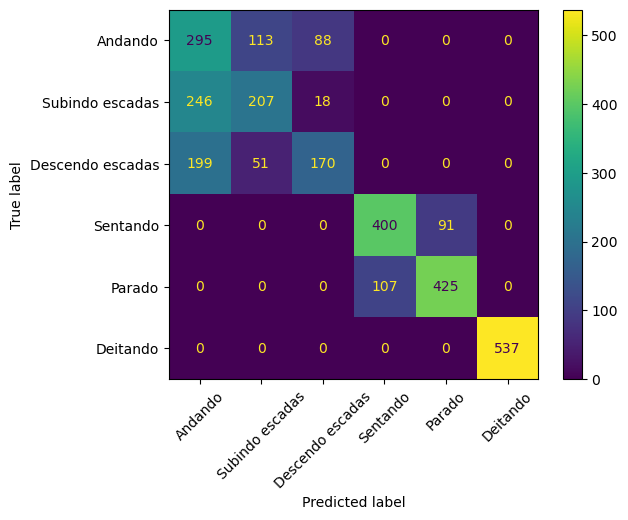

In [89]:
# Cálculo da acurácia do ajuste na base de teste
acuracia_teste = melhor_arvore.score(X_teste_filtrado, y_teste)

print(f'Acurácia do ajuste da base de teste na melhor árvore: {acuracia_teste*100:.2f}%')

# Lista com os nomes das atividades na variável resposta
classes = ['Andando', 'Subindo escadas', 'Descendo escadas',
           'Sentando', 'Parado', 'Deitando']

# Predições da variável resposta a partir da base de teste
predicoes = melhor_arvore.predict(X_teste_filtrado)

# Comparação entre os valores verdadeiros e os preditos na base de teste
matriz = confusion_matrix(y_teste, predicoes)

# Ajuste dos dados à matriz de confusão
display = ConfusionMatrixDisplay(confusion_matrix=matriz,
                              display_labels=classes)

# Montagem gráfica ad matriz de confusão
display.plot()

# Rotaciona os nomes no eixo x por 45 graus
plt.xticks(rotation=45)

# Visualização da matriz de confusão
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```min_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

#### 5.1 Verificação da taxa de erro de cada classe
Visualizando a matriz de confusão, vemos que as classes com maiores taxas de erros foram 'Andando', 'Subindo escadas' e 'Descendo escadas'. Para verificar qual delas teve a pior predição, vejamos a taxa de acertos de cada uma delas.
Por via das dúvidas, vejamos também a taxa de acertos nas atividades 'Sentando' e 'Parado' (no caso da atividade 'Deitando', a taxa de acertos foi de 100%). 

In [90]:
# Porcentagem de acertos da classe 'Andando'
andar = 295 / (113 + 88 + 295) * 100

# Porcentagem de acertos da classe 'Subindo escadas'
subir = 207 / (246 + 207 + 18) * 100

# Porcentagem de acertos da classe 'Descendo escadas'
descer = 170 / (170 + 51 + 199) * 100

# Porcentagem de acertos da classe 'Sentando'
sentar = 400 / (400 + 91) * 100 

# Porcentagem de acertos da classe 'Parado'
parar = 425 / (425 + 107) * 100

print(f'A taxa de acertos das predições da classe "Andando" foi de {andar:.1f}%.')
print(f'A taxa de acertos das predições da classe "Subindo escadas" foi de {subir:.1f}%.')
print(f'A taxa de acertos das predições da classe "Descendo escadas" foi de {descer:.1f}%.')
print(f'A taxa de acertos das predições da classe "Sentando" foi de {sentar:.1f}%.')
print(f'A taxa de acertos das predições da classe "Parado" foi de {parar:.1f}%.')

A taxa de acertos das predições da classe "Andando" foi de 59.5%.
A taxa de acertos das predições da classe "Subindo escadas" foi de 43.9%.
A taxa de acertos das predições da classe "Descendo escadas" foi de 40.5%.
A taxa de acertos das predições da classe "Sentando" foi de 81.5%.
A taxa de acertos das predições da classe "Parado" foi de 79.9%.


Vemos que a atividade 3: 'Descendo escadas' foi a que apresentou maior erro na predição (aproximadamente 40% de acertos). Dessa forma, vamos copiar as variáveis respostas de cada base e nestas cópias inserir duas novas colunas, uma identificando o nome da atividade e a outra sendo uma booleana em relação à atividade que apresentou maior taxa de erros. 

In [91]:
# Dicionário para identificar o nome das atividades de acordo com o número
atividades = {1: 'Andando', 2: 'Subindo escadas', 3: 'Descendo escadas',
              4: 'Sentando', 5: 'Parado', 6: 'Deitando'}

In [92]:
# Cópia da tabela com a variável resposta na base de treinamento
y_treino2 = y_treino.copy()

# Inserindo a coluna que identifica o nome da atividade
y_treino2['Atividade'] = y_treino2['0'].map(atividades)

# Criação da coluna booleana em relação à atividade com maior taxa de erros
y_treino2 = pd.get_dummies(y_treino2)
y_treino_final = y_treino2[['Atividade_Descendo escadas']]

# Visualização da nova tabela na base de treinamento
y_treino_final

,Atividade_Descendo escadas
0,0
1,0
2,0
3,0
4,0
...,...
7347,0
7348,0
7349,0
7350,0


In [93]:
# Cópia da tabela com a variável resposta na base de teste
y_teste2 = y_teste.copy()

# Inserindo a coluna que identifica o nome da atividade
y_teste2['Atividade'] = y_teste2['0'].map(atividades)

# Criação da coluna booleana em relação à atividade com maior taxa de erros
y_teste2 = pd.get_dummies(y_teste2)
y_teste_final = y_teste2[['Atividade_Descendo escadas']]

# Visualização da nova tabela na base de teste
y_teste_final

,Atividade_Descendo escadas
0,0
1,0
2,0
3,0
4,0
...,...
2942,0
2943,0
2944,0
2945,0


#### 5.2 Obtenção das novas 3 variáveis mais adequadas

Agora que temos a classe com maior taxa de erros na forma booleana, vamos criar uma nova árvore com profundidade máxima igual a 4 e número mínimo de observações por folha igual a 20 para determinar quais as variáveis mais importantes para a classe em questão. Nesta árvore, vamos inserir a base de treinamento completa (com todas as variáveis) e a variável resposta booleana em questão.

In [94]:
# Criação da ávore com profundidade máxima = 4 e número mínimo de amostras por folha = 20
nova_arvore = DecisionTreeClassifier(random_state=42, min_samples_leaf=20, max_depth=4)

# Ajuste da base de treino na árvore criada
nova_arvore.fit(X_treino, y_treino_final)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)

In [95]:
# Lista com os nomes das medidas
medidas = X_treino.columns

# Array com os valores de importância de cada variável
importancia = nova_arvore.feature_importances_

# Dicionário definindo as colunas do dataframe para classificação a partir das listas acima
dados = {'Medida': medidas, 'Grau de importância': importancia}

# Criação do dataframe de referência
classificacao_medida = pd.DataFrame(data=dados)

# Coloca as linhas em ordem decrescente de acordo com o grau de importância e mostra as 3 primeiras
classificacao_medida.sort_values(by=['Grau de importância'], ascending=False).head(3)

,Medida,Grau de importância
9,tBodyAcc-max()-X,0.775057
159,"tBodyGyro-correlation()-Y,Z",0.051200
504,fBodyAccMag-mad(),0.036257


A tabela final mostra que as variáveis mais importantes para a classe 'Andando' foram: 'tBodyAcc-max()-X', 'tBodyGyro-correlation()-Y,Z' e 'fBodyAccMag-mad()'. Vejamos a acurácia do ajuste da árvore de classificação com essas variáveis.

#### 5.3 Acurácia do ajuste com as novas variáveis

Acrescentando as 3 variáveis obtidas às 3 originais.

In [96]:
# Tomando as 6 colunas de maior importância da base de treino
X_treino_filtrado2 = X_treino[['tGravityAcc-mean()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 
                              'angle(Y,gravityMean)', 'tBodyAcc-max()-X', 
                               'tBodyGyro-correlation()-Y,Z', 'fBodyAccMag-mad()']]

# Tomando as 6 colunas de maior importância da base de teste
X_teste_filtrado2 = X_teste[['tGravityAcc-mean()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 
                              'angle(Y,gravityMean)', 'tBodyAcc-max()-X', 
                               'tBodyGyro-correlation()-Y,Z', 'fBodyAccMag-mad()']]

Obtenção dos novos ccp_alphas.

In [97]:
%%time

# Criação de uma nova árvore
arvore_nova = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20)

# Ajuste do caminho custo custo complexidade da árvore na base de treino
caminho_novo = arvore_nova.cost_complexity_pruning_path(X_treino_filtrado2, y_treino)

# Obtenção dos ccp_alphas e impurezas do ajuste
ccp_alphas2, impurezas2 = caminho_novo.ccp_alphas, caminho_novo.impurities

Wall time: 72.8 ms


Remoção de ccp_alphas negativos.

In [98]:
#garantindo que os ccp_alphas são únicos e positivos
ccp_alphas2 = np.unique(ccp_alphas2[ccp_alphas2>=0])

# Visualizando os valores no array ccp_alpha e o comprimento do vetor
print(f'Há {len(ccp_alphas2)} componentes no vetor ccp_alphas2.')
ccp_alphas2

Há 103 componentes no vetor ccp_alphas2.


array([0.00000000e+00, 6.43621258e-06, 6.53364574e-06, 7.29469359e-06,
       7.41913147e-06, 8.37030217e-06, 8.46900856e-06, 8.98965642e-06,
       1.01582623e-05, 1.08258755e-05, 1.11728587e-05, 1.12448256e-05,
       1.16993996e-05, 1.21470094e-05, 1.21547473e-05, 1.26089132e-05,
       2.26504414e-05, 3.17688426e-05, 3.95009465e-05, 4.24097575e-05,
       4.33462077e-05, 5.72833430e-05, 6.41940469e-05, 6.80087051e-05,
       7.57140632e-05, 8.28395565e-05, 8.41607726e-05, 8.73801478e-05,
       8.84113166e-05, 9.29179176e-05, 9.71753250e-05, 1.00670506e-04,
       1.02824748e-04, 1.08813928e-04, 1.14457869e-04, 1.28800160e-04,
       1.41684802e-04, 1.52168965e-04, 1.57123087e-04, 1.58972812e-04,
       1.83327814e-04, 2.01358029e-04, 2.20996243e-04, 2.46016893e-04,
       2.46805785e-04, 2.61912595e-04, 2.74650540e-04, 2.87958810e-04,
       2.92076560e-04, 3.12920965e-04, 4.02177856e-04, 4.26397908e-04,
       4.63212219e-04, 4.74620007e-04, 4.92866219e-04, 4.98450170e-04,
      

Seleção dos valores de ccp_alpha para o Grid Search.

In [99]:
# Seleciona 1 valor de ccp_alpha para cada 5 dentro do conjunto
grid_parametros2 = {'ccp_alpha':ccp_alphas2[::5]}

# Mostra os valores selecionados
grid_parametros2

{'ccp_alpha': array([0.00000000e+00, 8.37030217e-06, 1.11728587e-05, 1.26089132e-05,
        4.33462077e-05, 8.28395565e-05, 9.71753250e-05, 1.28800160e-04,
        1.83327814e-04, 2.61912595e-04, 4.02177856e-04, 4.98450170e-04,
        6.55150526e-04, 7.71614349e-04, 1.13015184e-03, 1.38834703e-03,
        1.76501406e-03, 2.31305614e-03, 4.22117367e-03, 8.58112740e-03,
        1.09327768e-01])}

Aplicação do Grid Search aos novos ccp_alphas.

In [100]:
%%time

# Gera um conjunto de árvores para cada valor de ccp_alpha (método K-fold com Holdout)
grid2 = GridSearchCV(estimator = arvore_nova, param_grid=grid_parametros2,cv=10, verbose=100)

# Ajuta a base de treinamento com as variáveis selecionadas a cada árvore gerada
grid2.fit(X_treino_filtrado2, y_treino) 

Fitting 10 folds for each of 21 candidates, totalling 210 fits
[CV 1/10; 1/21] START ccp_alpha=0.0.............................................
[CV 1/10; 1/21] END ..............ccp_alpha=0.0;, score=0.811 total time=   0.0s
[CV 2/10; 1/21] START ccp_alpha=0.0.............................................
[CV 2/10; 1/21] END ..............ccp_alpha=0.0;, score=0.822 total time=   0.0s
[CV 3/10; 1/21] START ccp_alpha=0.0.............................................
[CV 3/10; 1/21] END ..............ccp_alpha=0.0;, score=0.778 total time=   0.0s
[CV 4/10; 1/21] START ccp_alpha=0.0.............................................
[CV 4/10; 1/21] END ..............ccp_alpha=0.0;, score=0.743 total time=   0.0s
[CV 5/10; 1/21] START ccp_alpha=0.0.............................................
[CV 5/10; 1/21] END ..............ccp_alpha=0.0;, score=0.743 total time=   0.0s
[CV 6/10; 1/21] START ccp_alpha=0.0.............................................
[CV 6/10; 1/21] END ..............ccp_alpha=0.

[CV 10/10; 5/21] END ccp_alpha=4.334620765523902e-05;, score=0.890 total time=   0.0s
[CV 1/10; 6/21] START ccp_alpha=8.283955650071327e-05...........................
[CV 1/10; 6/21] END ccp_alpha=8.283955650071327e-05;, score=0.811 total time=   0.0s
[CV 2/10; 6/21] START ccp_alpha=8.283955650071327e-05...........................
[CV 2/10; 6/21] END ccp_alpha=8.283955650071327e-05;, score=0.822 total time=   0.0s
[CV 3/10; 6/21] START ccp_alpha=8.283955650071327e-05...........................
[CV 3/10; 6/21] END ccp_alpha=8.283955650071327e-05;, score=0.778 total time=   0.0s
[CV 4/10; 6/21] START ccp_alpha=8.283955650071327e-05...........................
[CV 4/10; 6/21] END ccp_alpha=8.283955650071327e-05;, score=0.743 total time=   0.0s
[CV 5/10; 6/21] START ccp_alpha=8.283955650071327e-05...........................
[CV 5/10; 6/21] END ccp_alpha=8.283955650071327e-05;, score=0.743 total time=   0.0s
[CV 6/10; 6/21] START ccp_alpha=8.283955650071327e-05...........................
[CV

[CV 1/10; 11/21] END ccp_alpha=0.0004021778555771084;, score=0.819 total time=   0.0s
[CV 2/10; 11/21] START ccp_alpha=0.0004021778555771084..........................
[CV 2/10; 11/21] END ccp_alpha=0.0004021778555771084;, score=0.810 total time=   0.0s
[CV 3/10; 11/21] START ccp_alpha=0.0004021778555771084..........................
[CV 3/10; 11/21] END ccp_alpha=0.0004021778555771084;, score=0.778 total time=   0.0s
[CV 4/10; 11/21] START ccp_alpha=0.0004021778555771084..........................
[CV 4/10; 11/21] END ccp_alpha=0.0004021778555771084;, score=0.743 total time=   0.0s
[CV 5/10; 11/21] START ccp_alpha=0.0004021778555771084..........................
[CV 5/10; 11/21] END ccp_alpha=0.0004021778555771084;, score=0.739 total time=   0.0s
[CV 6/10; 11/21] START ccp_alpha=0.0004021778555771084..........................
[CV 6/10; 11/21] END ccp_alpha=0.0004021778555771084;, score=0.780 total time=   0.0s
[CV 7/10; 11/21] START ccp_alpha=0.0004021778555771084.........................

[CV 4/10; 16/21] END ccp_alpha=0.0013883470261073037;, score=0.770 total time=   0.0s
[CV 5/10; 16/21] START ccp_alpha=0.0013883470261073037..........................
[CV 5/10; 16/21] END ccp_alpha=0.0013883470261073037;, score=0.739 total time=   0.0s
[CV 6/10; 16/21] START ccp_alpha=0.0013883470261073037..........................
[CV 6/10; 16/21] END ccp_alpha=0.0013883470261073037;, score=0.789 total time=   0.0s
[CV 7/10; 16/21] START ccp_alpha=0.0013883470261073037..........................
[CV 7/10; 16/21] END ccp_alpha=0.0013883470261073037;, score=0.792 total time=   0.0s
[CV 8/10; 16/21] START ccp_alpha=0.0013883470261073037..........................
[CV 8/10; 16/21] END ccp_alpha=0.0013883470261073037;, score=0.756 total time=   0.0s
[CV 9/10; 16/21] START ccp_alpha=0.0013883470261073037..........................
[CV 9/10; 16/21] END ccp_alpha=0.0013883470261073037;, score=0.830 total time=   0.0s
[CV 10/10; 16/21] START ccp_alpha=0.0013883470261073037........................

[CV 5/10; 21/21] END ccp_alpha=0.10932776807430389;, score=0.653 total time=   0.0s
[CV 6/10; 21/21] START ccp_alpha=0.10932776807430389............................
[CV 6/10; 21/21] END ccp_alpha=0.10932776807430389;, score=0.544 total time=   0.0s
[CV 7/10; 21/21] START ccp_alpha=0.10932776807430389............................
[CV 7/10; 21/21] END ccp_alpha=0.10932776807430389;, score=0.544 total time=   0.0s
[CV 8/10; 21/21] START ccp_alpha=0.10932776807430389............................
[CV 8/10; 21/21] END ccp_alpha=0.10932776807430389;, score=0.544 total time=   0.0s
[CV 9/10; 21/21] START ccp_alpha=0.10932776807430389............................
[CV 9/10; 21/21] END ccp_alpha=0.10932776807430389;, score=0.678 total time=   0.0s
[CV 10/10; 21/21] START ccp_alpha=0.10932776807430389...........................
[CV 10/10; 21/21] END ccp_alpha=0.10932776807430389;, score=0.635 total time=   0.0s
Wall time: 15.3 s


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 8.37030217e-06, 1.11728587e-05, 1.26089132e-05,
       4.33462077e-05, 8.28395565e-05, 9.71753250e-05, 1.28800160e-04,
       1.83327814e-04, 2.61912595e-04, 4.02177856e-04, 4.98450170e-04,
       6.55150526e-04, 7.71614349e-04, 1.13015184e-03, 1.38834703e-03,
       1.76501406e-03, 2.31305614e-03, 4.22117367e-03, 8.58112740e-03,
       1.09327768e-01])},
             verbose=100)

Criação da tabela com os dados dos novos ajustes.

In [101]:
# Cria um dataframe com as árvores desenvolvidas pelo GridSearch
resultados2 = pd.DataFrame(grid2.cv_results_)

# Mostra as 5 primeiras linhas da tabela
resultados2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.067827,0.003418,0.003221,0.000707,0.0,{'ccp_alpha': 0.0},0.811141,0.822011,0.778231,0.742857,0.742857,0.780952,0.801361,0.746939,0.865306,0.889796,0.798145,0.048049,8
1,0.068693,0.003704,0.003417,0.000597,0.000008,{'ccp_alpha': 8.370302167908699e-06},0.811141,0.822011,0.778231,0.742857,0.742857,0.780952,0.801361,0.746939,0.865306,0.889796,0.798145,0.048049,8
2,0.067148,0.005283,0.003097,0.000108,0.000011,{'ccp_alpha': 1.1172858697341471e-05},0.811141,0.822011,0.778231,0.742857,0.742857,0.780952,0.801361,0.746939,0.865306,0.889796,0.798145,0.048049,8
3,0.064447,0.001891,0.003019,0.000452,0.000013,{'ccp_alpha': 1.2608913210962469e-05},0.811141,0.822011,0.778231,0.742857,0.742857,0.780952,0.801361,0.746939,0.865306,0.889796,0.798145,0.048049,8
4,0.070574,0.009606,0.003562,0.001021,0.000043,{'ccp_alpha': 4.334620765523902e-05},0.811141,0.822011,0.778231,0.742857,0.742857,0.780952,0.801361,0.746939,0.865306,0.889796,0.798145,0.048049,8


Ajuste da base de treino à melhor árvore.

In [102]:
# Pega o valor do ccp_alpha com melhor acurácia na tabela gerada a partir do índice e coluna de ccp_alpha (no caso, a 4)
melhor_ccp2 = resultados.iloc[grid2.best_index_,4]

# Cria uma árvore com este ccp_alpha
melhor_arvore2 = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp2)

# Ajusta a base de treino com as 6 melhores variáveis à árvore gerada
melhor_arvore2.fit(X_treino_filtrado2, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0009240486765534495, random_state=2360873)

Cálculo da acurácia na base de testes e visualização da matriz de confusão.

Acurácia do ajuste da base de teste na melhor árvore: 78.86%


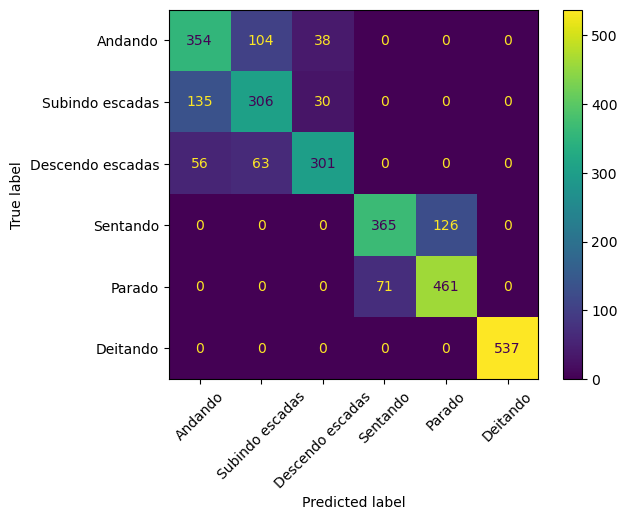

In [103]:
# Cálculo da acurácia do ajuste na base de teste
acuracia_teste2 = melhor_arvore2.score(X_teste_filtrado2, y_teste)

print(f'Acurácia do ajuste da base de teste na melhor árvore: {acuracia_teste2*100:.2f}%')

# Lista com os nomes das atividades na variável resposta
classes = ['Andando', 'Subindo escadas', 'Descendo escadas',
           'Sentando', 'Parado', 'Deitando']

# Predições da variável resposta a partir da base de teste
predicoes2 = melhor_arvore2.predict(X_teste_filtrado2)

# Comparação entre os valores verdadeiros e os preditos na base de teste
matriz2 = confusion_matrix(y_teste, predicoes2)

# Ajuste dos dados à matriz de confusão
display2 = ConfusionMatrixDisplay(confusion_matrix=matriz2,
                              display_labels=classes)

# Montagem gráfica ad matriz de confusão
display2.plot()

# Rotaciona os nomes no eixo x por 45 graus
plt.xticks(rotation=45)

# Visualização da matriz de confusão
plt.show()

Cálculo da taxa de acertos da predição de cada classe, dado que a atividade 'Deitando' permaneceu com 100% de acerto.

In [104]:
# Porcentagem de acertos da classe 'Andando'
andar = 354 / (354 + 104 + 38) * 100

# Porcentagem de acertos da classe 'Subindo escadas'
subir = 306 / (135 + 306 + 30) * 100

# Porcentagem de acertos da classe 'Descendo escadas'
descer = 301 / (56 + 63 + 301) * 100

# Porcentagem de acertos da classe 'Sentando'
sentar = 365 / (365 + 126) * 100 

# Porcentagem de acertos da classe 'Parado'
parar = 461 / (461 + 71) * 100

print(f'A taxa de acertos das predições da classe "Andando" foi de {andar:.1f}%.')
print(f'A taxa de acertos das predições da classe "Subindo escadas" foi de {subir:.1f}%.')
print(f'A taxa de acertos das predições da classe "Descendo escadas" foi de {descer:.1f}%.')
print(f'A taxa de acertos das predições da classe "Sentando" foi de {sentar:.1f}%.')
print(f'A taxa de acertos das predições da classe "Parado" foi de {parar:.1f}%.')

A taxa de acertos das predições da classe "Andando" foi de 71.4%.
A taxa de acertos das predições da classe "Subindo escadas" foi de 65.0%.
A taxa de acertos das predições da classe "Descendo escadas" foi de 71.7%.
A taxa de acertos das predições da classe "Sentando" foi de 74.3%.
A taxa de acertos das predições da classe "Parado" foi de 86.7%.


Os resultados mostram que a acurácia do ajuste na nova árvore foi superior por aproximadamente 10% em relação à obtida na etapa anterior da atividade. Além disso, verifica-se que quase todas as atividades apresentaram maiores taxas de acerto em relação à primeira tentativa, com exceção da atividade 'Sentando' que caiu de 81,5% para 74,3%. Apesar disso, vemos que a inserção das 3 variáveis adicionais melhoraram o ajuste.